# 확률적 경사하강법

**럭키백 이벤트 이후 : 매출액이 증가했으나 "이벤트" 를 현재 수준으로 계속 유지하기 어려움**

 (현재 이벤트) 매주 7개의 생선 중에 일부를 무작위로 뽑아내서 인공지능 모델을 학습 

(문제점 발생)
1> 샘플을 매번 뽑아야 한다. 
2> 새롭게 추가되는 생선의 경우 샘플이 아직 존재하지 않는다. 

그렇다면 **기존의 훈련 데이터에 매번 새로운 데이터를 추가해서 모델을 매일 훈련시키면 될까?**

* 매일 추가되는 데이터는 계속해서 늘어난다 -> 연 단위로 갈 경우 서버비용, 관리비용 등 관리 문제 발생

새로운 데이터를 추가할 때 **이전 데이터를 버리고 다시 새로운 모델을 훈련**시키면 어떨까?


* 데이터를 버릴 때 중요한 데이터가 포함되 있다면 예측에 문제가 발생한다.

(결론) **훈련한 모델을 버리지 않고,새로운 데이터에 대해서 조금씩만 더 훈련**한다. 

이러한 방식은 **점진적 학습** 또는 **온라인 학습**이라고 하며, 대표적인 점진적 학습알고리즘으로 **확률적 경사하강법**이 있다. 

#12-2 확률적 경사 하강법(Stochastic Gradient Descent)

## 1) 등산을 통해본 확률적 경사 하강법과 에포크

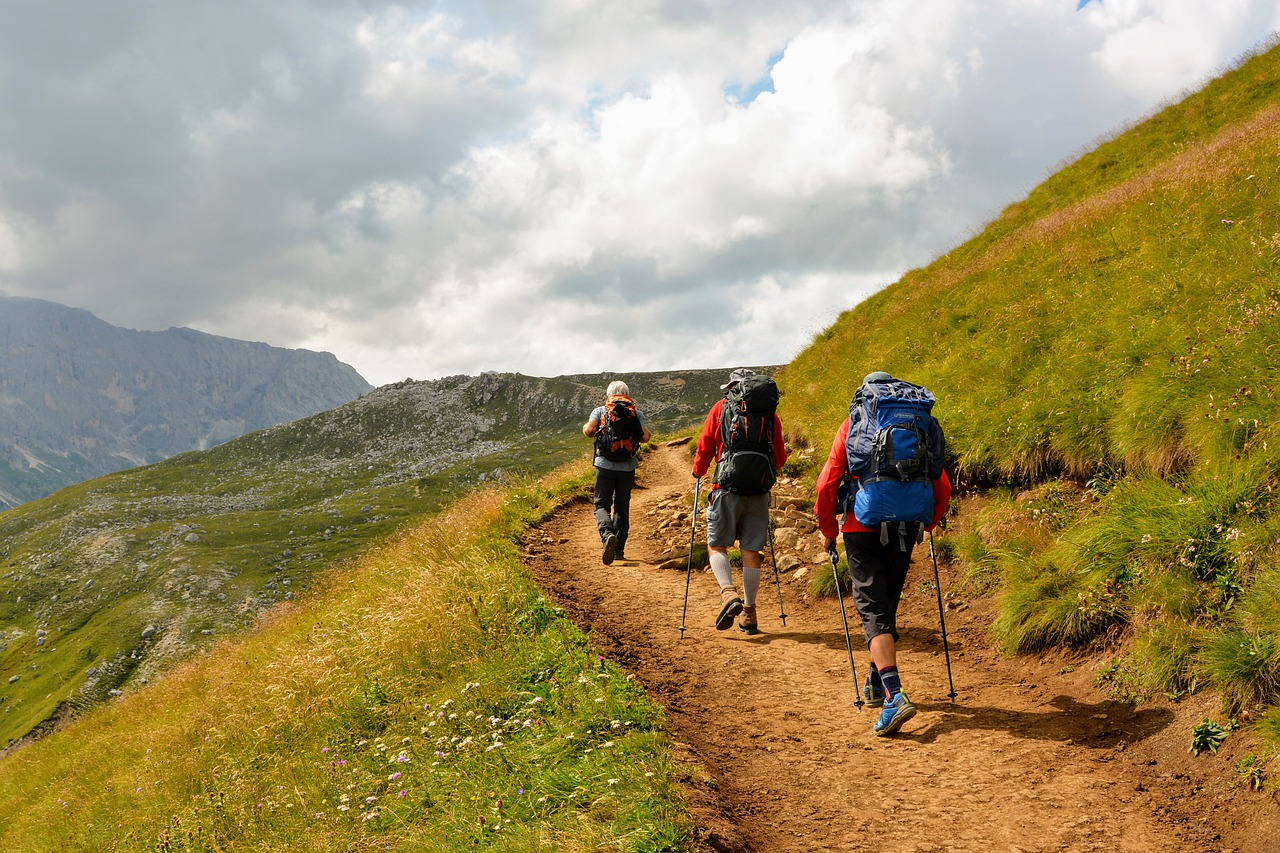

(교재의 예시) 산을 내려가는 방법 : 안전하게 내려가려면 **천천히 조금씩 내려가야 한다.** 
=> 경사하강법

그렇다면 확률적의 의미는?

=> 훈련세트를 이용해서 가장 빠른(가파른 길)을 찾는데, **랜덤하게 하나의 샘플을 골라서 찾는다.**

(예)  산을 내려간다 -> 훈련 세트에서 랜덤하게 하나의 샘플을 골라서 학습 ->
> (얼마 가다가) -> 혼련 세트에서 또 다른 하나의 샘플을 골라서 학습...**(전체 샘플 사용할 때 까지 반복)**

[질문] 만약 산에 내려오는 데 실패한다면 -> 처음 부터 다시 시작한다.

확률적 경사 하강법에서 훈련세트를 한번 씩 모두 사용하는 것을 **에포크(Epoch)**라고 부르며, \
일반적으로 경사하강법은 수십, 수백번 이상의 에포크를 수행한다.

##2) 경사하강법의 종류

미니배치경사하강법(Minibatch Gradient Descent) : 한 번에 여러 개의 샘플을 사용

배치경사하강법(Bath Gradient Descemt) : 전체 샘플을 사용한다. 

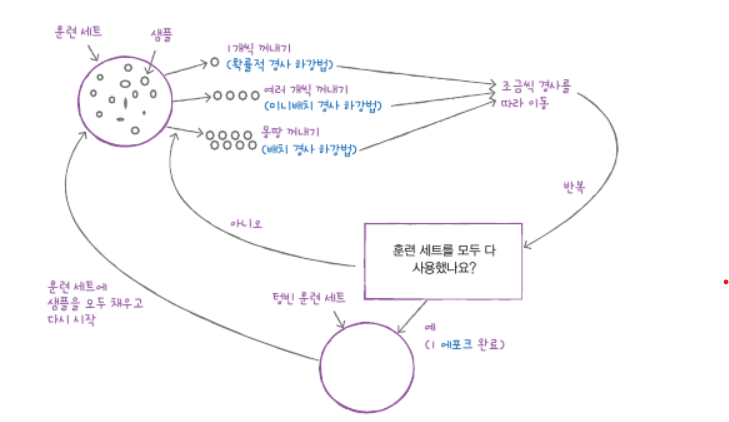

## 3) 손실함수(Loss Function)

우리가 해결하고자 하는 문제에서 머신러닝 알고리즘을 측정하는 기준

"얼마나 **부정확**한지를 측정하는 기준"

따라서 **손실함수의 값을 최소화**하는 것이 우리의 목표다.

**[도미/빙어 분류]**

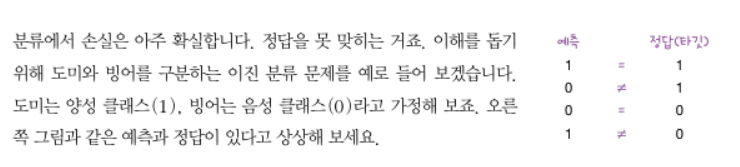

하지만 도미와 빙어의 분류문제는 이산형이다. 따라서 경사하강법을 사용하기엔 적정하지 않다.

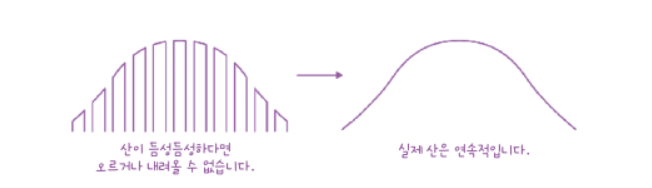



어떤 표본(Sample) 4개에 대해서 예측확률이 다음과 같음


**1번째 : 0.9**    => "정답이 1인데 이를 1이라고 할 확률이 0.9이다."

**2번쨰 : 0.3**    => "정답이 1인데 이를 1이라고 할 확률이 0.3이다."

**3번째 : 0.2**    => "정답이 0인데 이를 0이라고 할 확률은 0.2이다"
 
**4번째 : 0.8**    => "정답이 0인데 이를 0이라고 할 확률은 0.8이다"


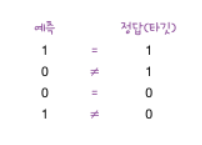

1번째 샘플의 정확도는 0.9인데 이를 다음과 같이 변환


손실함수이기 때문에 어떤 **음(-)의 값**으로 정확도를 표시함 



**0.9 x 1 ---------> -0.9**
(확률) (정답)       (마이너스로 표시) 


만약에 정확도가 1이라면 아래와 같이 -1이 나온다.

**1.0 x 1 ---------> -1.0**
(확률) (정답)       (마이너스로 표시) 



2번째 샘플의 정확도는 0.3이며, 마찬가지로 다음과 같이 변환

0.3 x 1 ---------> -0.3

즉, 정확도를 나타내는 손실함수의 최대 값은 -1이라고 할 수 있음 

그렇다면 3번째 샘플의 경우 같은 논리로  

**0.2 x 0 ---------> 0**

라고 할 수 있는가?

아니다. 무조건 0이 되기 떄문에 디음과 같이 바꿔준다.


**0.8 x 1 ---------> -0.8**



따라서 4번째 샘플의 정확도는 다음과 같이 계산한다.

**0.2 x 1 ---------> -0.2**



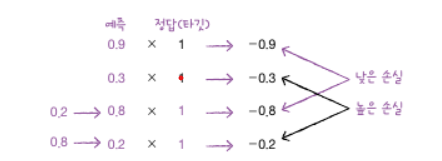

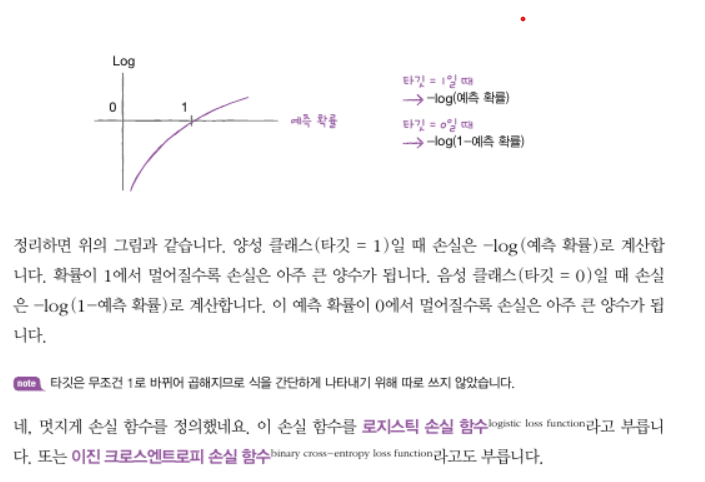

#12-3) SGDClassifier

손실함수를 우리가 직접 만드는 경우는 드물고, 대부분 주어진 알고리즘을 사용한다. 

In [ ]:
#데이터를 불러오는 단계 : 웹페이지의 데이터를 끌고와서 데이터프레임으로 만든다.
#이를 위해서 pandas를 사용  

import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
#입력할 데이터 값(생선의 무게, 길이, 대각선 길이, 높이, 너비)
#타겟 값 : 생선의 종류 

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
#훈련용 세트와 검증(테스트)세트로 나눈다.
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
#데이터를 표준화 해서 전처리 한다.
#중요 -> 훈련용 데이터를 표준화 하면, 검증(테스트) 데이터도 반드시 표준화해야 한다
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

#표준화를 거친 값(~scaled)로 훈련용 데이터, 검증(테스트)데이터 값을 새로 저장
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
#사이킷런(sklearn)에서 제공하는 확룰적 경사하강법 사용

from sklearn.linear_model import SGDClassifier

In [ ]:
#손실 함수를 정의할 때는 2개의 매개변수를 지정
#손실함수의 형태 : 여기서는 log함수로 지정함
#반복횟수(max_lter) 지정 : 여기서는 10번 

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)

#정의된 sc함수로 훈련시작 
sc.fit(train_scaled, train_target)

#훈련세트와 테스트 세트에서 정확도(sc.score)를 출력 

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


(경고창)

ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)

모델이 충분이 수렴하지 않았다라고 경고를 보냄 : 오류가 아님 (반복 횟수를 늘려서 해결)  

In [ ]:
#반복 횟수를 늘립니다. 10번--->100번
#손실 함수를 정의할 때는 2개의 매개변수를 지정
#손실함수의 형태 : 여기서는 log함수로 지정함
#반복횟수(max_lter) 지정 : 여기서는 100번 

sc = SGDClassifier(loss='log', max_iter=10000, random_state=42)

#정의된 sc함수로 훈련시작 
sc.fit(train_scaled, train_target)

#훈련세트와 테스트 세트에서 정확도(sc.score)를 출력 

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8403361344537815
0.8


In [ ]:
#sc.partial_fit은 데이터를 다시 훈련/테스트 세트로 만들어서 훈련하지 않음
#조금씩(1에포크 씩)추가해서 훈련함 

sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.907563025210084
0.925


#12-4) 에포크와 과대/과소적합 

- epoch의 사전적 의미는 "중요한 사건 또는 변화들이 일어난 시대를 의마함
- 인공지능에서 에포크는 학습의 횟수를 의미합니다.

- 배치의 사전적 의미는 batch의 "집단, 무리 또는 한 회분"이며, 일괄 처리를 위해) 함께 묶다" 등이 있음

- 예를 들어 1000개의 훈련 샘플이 있는데, 배치 사이즈가 20이라면 20개의 샘플 단위마다 모델의 가중치를 한번씩 업데이트시킵니다. 

(예시) 만약 에포크가 10이고  배치 사이즈가 20

=> 가중치를 50번 업데이트하는 것을 총 10번 반복합니다. 
   각 데이터 샘플이 총 10번씩 사용되는 것으로, 가중치가 총 500번 업데이트 


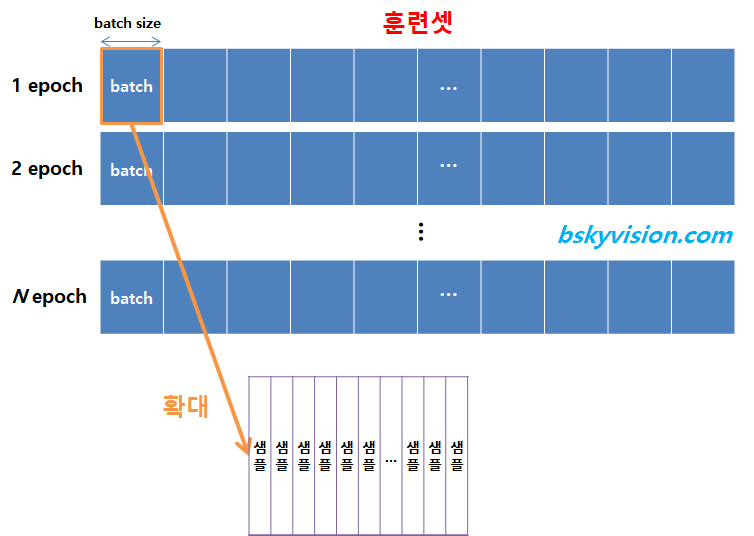

**- 배치 사이즈가 너무 클 경우**

  : 한번에 처리해야할 양이 그만큼 많기 때문에 학습 속도가 느려지고,
  : 어떤 경우에는 메모리 부족 문제를 겪을 수도 있음.
  
  =>  이런 경우에는 배치 사이즈를 조금 줄여서 훈련셋을 더 많은 배치로 나눠서 
      모델을 훈련 
  
**- 배치 사이즈가 너무 작을 경우**

 :  너무 적은 샘플을 참조해서 가중치가 자주 업데이트되기 때문에 불안정하게 훈련
 
 (결론) 따라서 배치 사이즈를 바꿔가면서 언제 모델이 가장 효율적으로 훈련되는지를 살펴본다. 

### 에포크 횟수가 지나치게 많거나 적을 경우의 문제점

에포크 횟수가 지나치게 적다 = 산을 다 내려오지 못하고 훈련을 마침 (과소 적합)

에포크 횟수가 지나치게 많다 = 지나치게 많은 훈련으로 오히려 효율성이 떨어짐 (과대 적합) 

훈련세트 점수 : epoch가 진행 될 수록 꾸준히 증가한다.

테스트 데이터 점수 : epoch가 진행 될 수록 증가하다가 감소한다. 

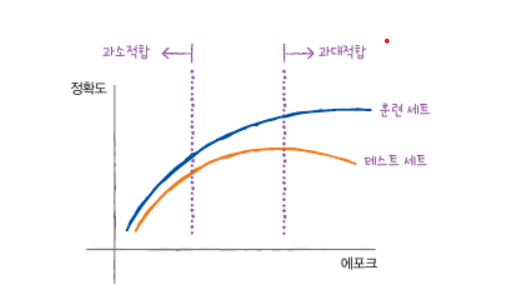

In [ ]:
#모델의 정확도를 평가하기 위해서 훈련용 데이터(세트)의 정확도, 테스용 데이터(세트)의 정확도를 계속 저장하는 함수를 정의함 
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [ ]:
#1번 부터 300번까지 반복 (한번에 300번 돌리는 것이 아님 )

for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

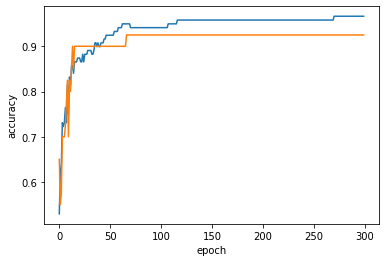

In [ ]:
#정확도 점수를 그래프로 시각화함 

import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
# 그림을 보니까 대략 100번째 부터 테스트 세트와 훈련용 세트의 정확도 점수가 벌어지기 시작
# 그래서 epoch를 100번에 맞춤 

sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [ ]:
#loss함수의 형태를 hinge로 정정해서 사용할 경우
#loss함수에는 여러 형태기 존재하며, loss함수의 기본 값은 hinge이다.

sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
